In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import datetime
import cv2
import scipy.io
import obspy

import daslib

Los videos duran 85sg exactos.
Posición central en los videos mas o menos 1127m
la duración de las medidas es aprox 82sg

In [10]:
denv = daslib.DasEnviroment()

In [11]:
root_folder = "Z:/DAS/2021-11-30_Medidas"
dfn = "medida_211130_11_55_19.mat"
vfn = "medida_211130_11_55_19.mp4"

#combine path
dpath = os.path.join(root_folder, dfn)
vpath = os.path.join(root_folder, vfn)
#read mat file
das_np = daslib.load_das_mat(dpath)
print(das_np.shape)
#print(F"tiempo total: {mat['Fp'].shape[0]/(1/0.005200208008320333)} s")

(16000, 1160)


In [12]:

#combine path
dpath = os.path.join(root_folder, dfn)
vpath = os.path.join(root_folder, vfn)
#read mat file
das_np = daslib.load_das_mat(dpath)
print(das_np.shape)
#print(F"tiempo total: {mat['Fp'].shape[0]/(1/0.005200208008320333)} s")

(16000, 1160)


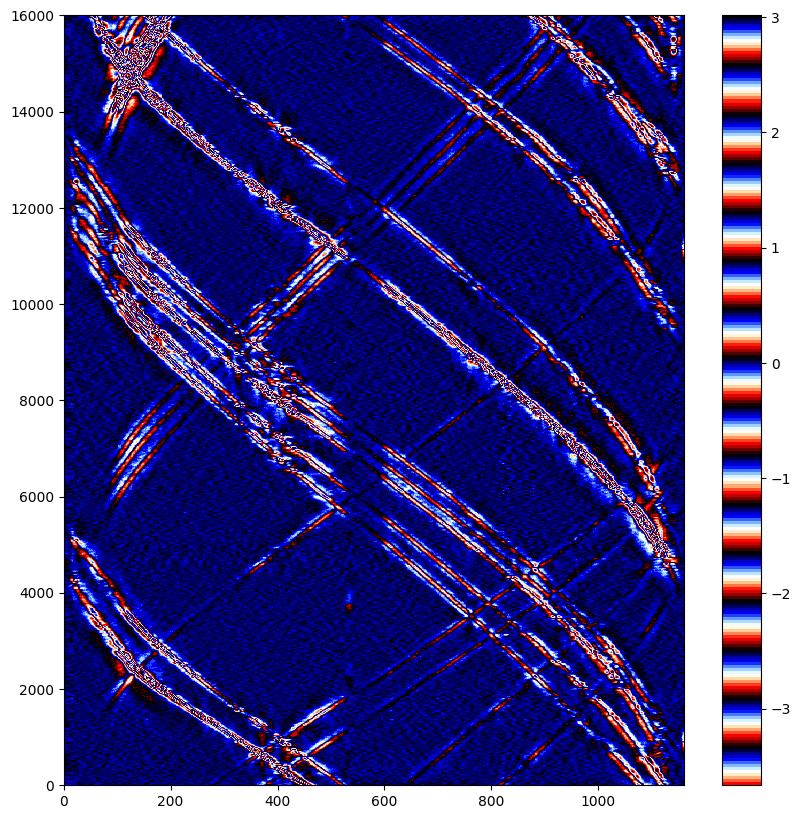

In [13]:
#make a pcolormesh of the data
plt.figure(figsize=(10,10))
plt.pcolormesh(das_np)
plt.colorbar()
#change color palette
#list color palettes ""FLAG"
plt.set_cmap("flag")
plt.show()
#save figure



In [14]:
#convert das_np to obspy stream
das_stream = obspy.Stream()
for i in range(das_np.shape[1]):
    das_stream.append(obspy.Trace(data=das_np[:,i]))
    das_stream[i].stats.starttime = obspy.UTCDateTime(datetime.datetime(2021,11,30,11,55,19))
    das_stream[i].stats.sampling_rate = 1/denv.Ts
    das_stream[i].stats.distance = denv.Tl * i
#set stream sampling rate
print(das_stream)



1160 Trace(s) in Stream:

... | 2021-11-30T11:55:19.000000Z - 2021-11-30T11:56:38.995000Z | 200.0 Hz, 16000 samples
...
(1158 other traces)
...
... | 2021-11-30T11:55:19.000000Z - 2021-11-30T11:56:38.995000Z | 200.0 Hz, 16000 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]


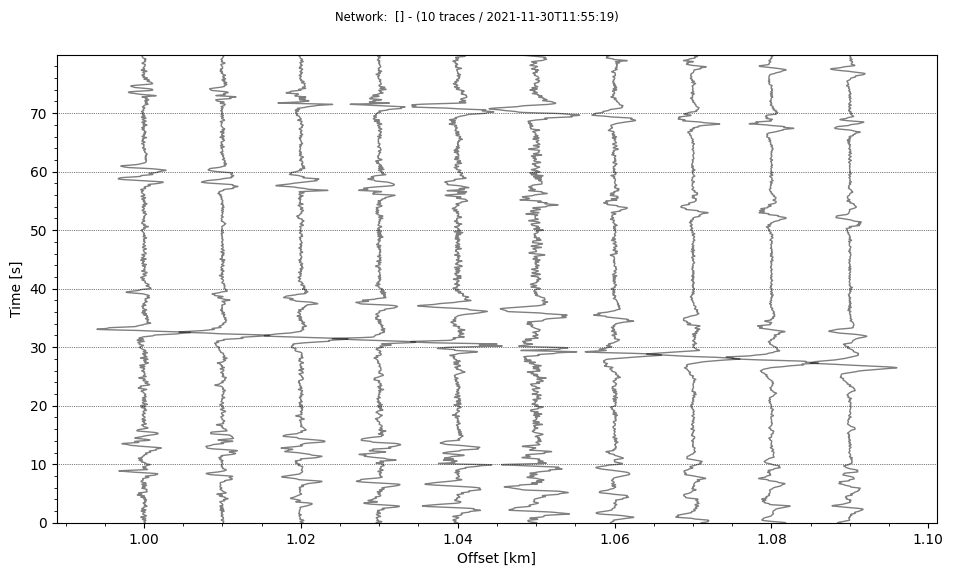

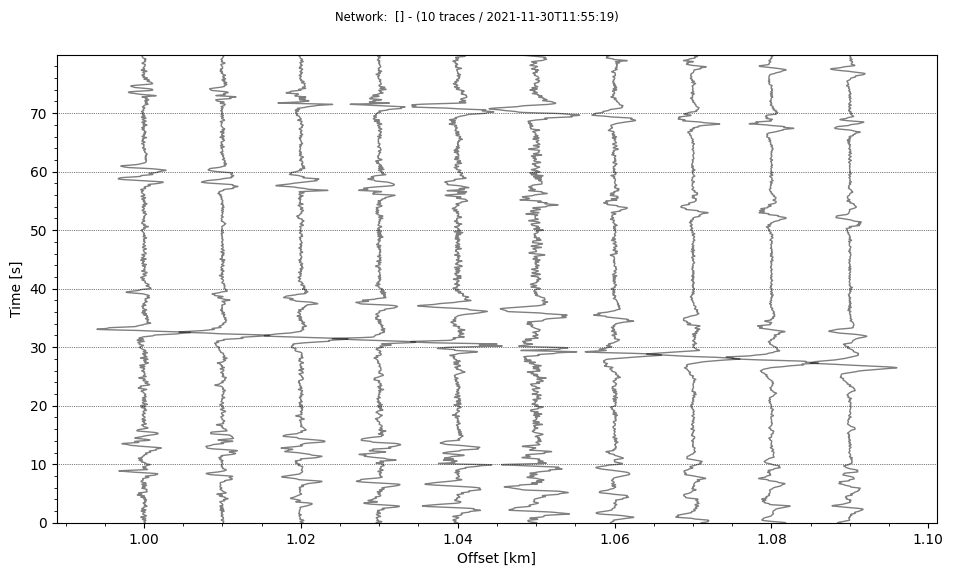

In [15]:
das_stream[1000:1100:10].plot(type='section', norm_method='trace')

In [16]:
#plot the data
plt.figure(figsize=(6, 3))
plt.plot(mat["Fp"].transpose())
print((mat["Fp"]).shape)
print(mat["Fp"])

print ((mat["distancia"].shape))


NameError: name 'mat' is not defined

<Figure size 600x300 with 0 Axes>